# Elements of structured data

There are two basic types of structured data:
## Numeric
* Continuous -> Can take infinite values in an interval (measurement/inference);
* Discrete -> Only ordered integer values (count).
## Categorical
* Nominal -> Classifies without order (classes);
* Ordinal -> Sorts in order (e.g. hierarchy);
* Binary -> Can take 2 values - 0/1, true/false.

Pandas data types: https://oreil.ly/UGX-4 <br>
SQL data types: https://oreil.ly/cThTM

# Rectangular data
The most important data structure in data science is the rectangular (tabular), in this case, a two-dimensional matrix with rows (records) and columns (variables) with an index to identify the record. <br>
In an analysis there a feature (inputs to analyze) and outcomes (analysis results/predict). <br>
But, in some cases, the data could be nonrectangular like time series, spatial data structures, graphs. So, data processing is also part of a data scientist's job.

# Estimates of location

## Mean

The most basic estimate value is the mean, the sum of all values divided by the number of values.
$$
x = \frac{\sum_{i=1}^{n} xi}{n}
$$
* NOTE: The x represents the average of the entire population and xbar of the sample. Just as N represents the number of values in the population and n in the sample. <br>

The weighted mean is the sum of all values multiplied by their weights divided by the sum of weights. Is useful when some value is more variable than other or some group is underrepresented.
$$
xw = \frac{\sum_{i=1}^{n} xi*wi}{\sum_{i=1}^{n} wi}
$$
The trimmed mean is mean without the p-smallest and p-biggest values (sorted). This is estimate eliminates the influence of extreme values.
$$
xt = \frac{\sum_{i=p+1}^{n-p} xi}{n - 2p}
$$
Trimmed weighted mean:
$$
xtw = \frac{\sum_{i=p+1}^{n-p} xi * wi}{\sum_{i=p+1}^{n-p} wi}
$$


## Median and robust estimates

Median is the middle number on a sorted list. If there is an even number of data values, the median is the mean of the two middle values on the sorted list. Divide the data in 50%/50%. <br>
Obs: It is possible to calculate a weighted mean. In this case, it is a value that divides the weights into two parts, the sum of which is equal for each part. <br><br>
Outliers -> Extreme values, any value that is very distant from the other values. The outlier can be a valid value or result of bad data/errors. <br>
The median or trimmed/weighted mean is less sensitive to outliers than mean. But it is necessary to analyze the benefits of using them according to the size of the data set. <br>
Obs: Anomaly detection -> Detection of outliers for investigation and determination if it is result of bad data or not. <br>


## Example: Location Estimates of Brazil Demographic Data

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../datasets/data.csv')
data.columns = ['State', 'Sex', 'Age', 'Color', 'Years of Study', 'Salary', 'Height']
data.head()

,State,Sex,Age,Color,Years of Study,Salary,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
data['Age'].mean()

44.07142113482561

In [4]:
stats.trim_mean(data['Age'],0.1)

43.65834851639771

In [5]:
data['Age'].median()

43.0

In [6]:
np.average(data['Years of Study'], weights=data['Age'])

9.125607421109079

In [7]:
import wquantiles as wq 
wq.median(data['Years of Study'], weights=data['Age'])

9.0

## Estimates of variability

In addition to summary measures, there are measures of variation that indicate how disperses the data is.  <br>
An important estimate of variability is deviations, which are based on the difference between observed data and some estimate of location, that show us how dispersed the data is relation to a central value. <br>
Ex: Mean Absolute Deviation -> Average of the deviations of the observed data in relation to the data mean. <br>
$$
meanad = \frac{\sum_{i=1}^{n} |x - xbar|}{n}
$$
OBS: It is necessary to use the absolute difference so that the negative deviations do not cancel out the positive ones and so that the sum is not equal to zero.

### Standard deviation and related estimates

Another two important estimates of variability is veriance and standard deviation.<br>
The variance is the average of squared deviations, and the std is the squared root of variance.<br>
$$
v = \frac{\sum_{i=1}^{n} (xi - xbar)²}{n-1}
$$

$$
std = \sqrt{v}\
$$
The std returns the estimates to original scale, but these estimates are very sensitive to extreme values. It is preferred over the mean absolute deviation.<br>
A robust estimate is the MAD (median absolute deviation) -> the median of absolute deviation between observed data and the median.<br>
$$
mad = \text{Med}(|x1 - m|, |x2 - m|,... |xn - m|)
$$
In a normal distribution, the MAD can be multiplied by the factor k = 1.4826 to normalize to the standard deviation scale, so the MAD splits the data 50/50.

### Estimates based on percentiles

The pth percentile is a value that is equal to or greater than p-percent of an ordered list.A commom estimate of variability is IQR (interquartile range), which is the difference bettween the 75th and 25th.$$Percentil(P) = (1 - w)*x[j] + w*x[j+1]$$where:$$w = k - j$$$$k = \frac{p}{100}
*(n - 1)$$$$j = int(k)$$w represents the fractional percentile position (p) between two adjacent numbers.

### Example: Variability Estimates of Brazil Demographic Data

In [8]:
data['Age'].std()

12.480583465360187

In [9]:
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
IQR

19.0

In [10]:
from statsmodels.robust.scale import mad as smad
smad(data['Salary'])

815.431220178081

## Exploring the Data Distribution

Variability estimates are a summary in a single number, it is also useful to explore the distribution of the data.
Common -> Quartiles and deciles.

In [11]:
data['Age'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    25.0
0.25    34.0
0.50    43.0
0.75    53.0
0.95    65.0
Name: Age, dtype: float64

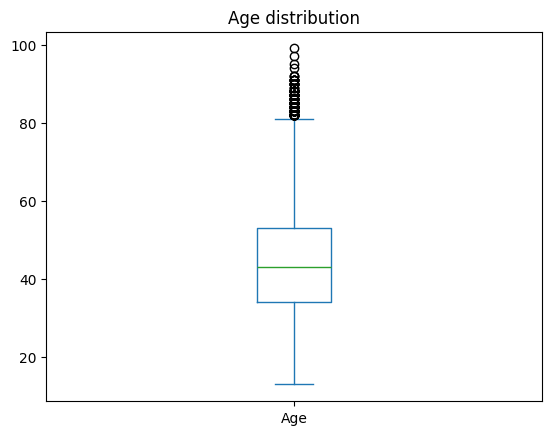

In [12]:
data['Age'].plot(kind='box')
plt.title('Age distribution')
plt.show()

The boxplot graph shows us how the data is distributed, the box is defined with 25th (Q1), 50th (Q2) and 75th (Q3) representing 50% of the values, the upper and lower limits are defined by Q3 + 1.5 * IQR and Q1 - 1.5 * IQR respectively, and the single points outside the limits represent the outliers.


## Frequency tables and histograms

The frequency table divides the data into equally spaced intervals (bins) and counts how many values are within each bin.

In [36]:
until_20k_salary = data.query("Salary >= 0 and Salary <= 20000")

In [37]:
binnedIncomes = pd.cut(until_20k_salary['Salary'], 25)
binnedIncomes.value_counts().sort_index()

Salary
(-20.0, 800.0]        24998
(800.0, 1600.0]       26231
(1600.0, 2400.0]       9614
(2400.0, 3200.0]       5870
(3200.0, 4000.0]       3086
(4000.0, 4800.0]        748
(4800.0, 5600.0]       1901
(5600.0, 6400.0]        792
(6400.0, 7200.0]        657
(7200.0, 8000.0]        669
(8000.0, 8800.0]         69
(8800.0, 9600.0]        191
(9600.0, 10400.0]       651
(10400.0, 11200.0]      106
(11200.0, 12000.0]      221
(12000.0, 12800.0]       14
(12800.0, 13600.0]       71
(13600.0, 14400.0]       66
(14400.0, 15200.0]      267
(15200.0, 16000.0]       87
(16000.0, 16800.0]        4
(16800.0, 17600.0]       35
(17600.0, 18400.0]       51
(18400.0, 19200.0]       20
(19200.0, 20000.0]      162
Name: count, dtype: int64

A histogram is a visual way to represents a frequency table, with the bins on he x-axis and the count on the y-axis. *OBS: The bars are continuous - empty spaces represents an empty bin. *Extra: Skewness refer to whether the data is assimetric (up or down) and kurtosis indicates the propensity of the data to have outliers.

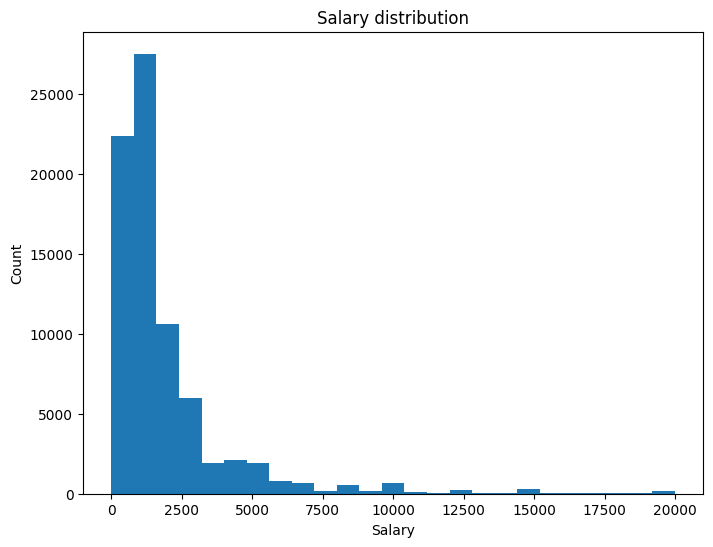

In [39]:
plt.figure(figsize=(8,6))
until_20k_salary['Salary'].plot(kind='hist', bins=25)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()